# Named Entity Recognition - Data Exploration

## Introduction
In this notebook, we will explore the **CoNLL-2003** dataset for Named Entity Recognition (NER). The dataset is widely used for benchmarking NER models and includes annotations for entities such as **persons (PER)**, **locations (LOC)**, **organizations (ORG)**, and **miscellaneous (MISC)** entities.

The goal of this notebook is to:
- Load and inspect the dataset.
- Analyze the distribution of entities.
- Identify any potential issues (e.g., missing data).
- Make preliminary observations for data preprocessing and modeling.

We will be using the **Hugging Face Datasets** library for easy access and management of the dataset. Available at https://huggingface.co/datasets/eriktks/conll2003



## Installing dependencies

You will be prompted to allow Huggingface to download the dataset below:

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Import necessary libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CoNLL-2003 dataset using Hugging Face Datasets library
dataset = load_dataset("conll2003")

print("Data downloaded succesfully", dataset)

Data downloaded succesfully DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})


## Dataset Preview
Let's take a quick look at the structure of the dataset. The CoNLL-2003 dataset consists of three splits:
- **Train:** The training data used for model training.
- **Validation:** The data used for model validation during training.
- **Test:** The data used for final evaluation.

We will preview a sample from the **training set** to understand its structure.


In [ ]:
# Preview a sample from the training set
sample = dataset['train'].to_pandas().head()
sample


,id,tokens,pos_tags,chunk_tags,ner_tags
0,0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]"
2,2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]"
3,3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."


## Data Format
The dataset consists of several columns:
- **id:** A unique identifier for each sentence.
- **tokens:** The list of tokens (words) in the sentence.
- **ner_tags:** The NER tags for each token. The tags follow the BIO format:
  - **B-PER:** Beginning of a person entity
  - **I-PER:** Inside a person entity
  - **B-LOC:** Beginning of a location entity
  - **I-LOC:** Inside a location entity
  - **B-ORG:** Beginning of an organization entity
  - **I-ORG:** Inside an organization entity
  - **O:** Outside of any named entity

<br>

---

<br>

  ## Statistics





In [ ]:
# Check the number of samples in each split
train_size = len(dataset['train'])
validation_size = len(dataset['validation'])
test_size = len(dataset['test'])

print(f"Training Set Size: {train_size} samples")
print(f"Validation Set Size: {validation_size} samples")
print(f"Test Set Size: {test_size} samples")

# Display the unique NER tags
ner_tags = dataset['train'].features['ner_tags'].feature.names
print("NER Tags:", ner_tags)

Training Set Size: 14041 samples
Validation Set Size: 3250 samples
Test Set Size: 3453 samples
NER Tags: ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


---

## Class Distribution Analysis
We will analyze the distribution of NER tags in the training set. This will help us understand the class balance and whether there are any dominant or underrepresented classes.


<ipython-input-9-a7507dd34722>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_labels, y=tag_counts.values, palette='viridis')


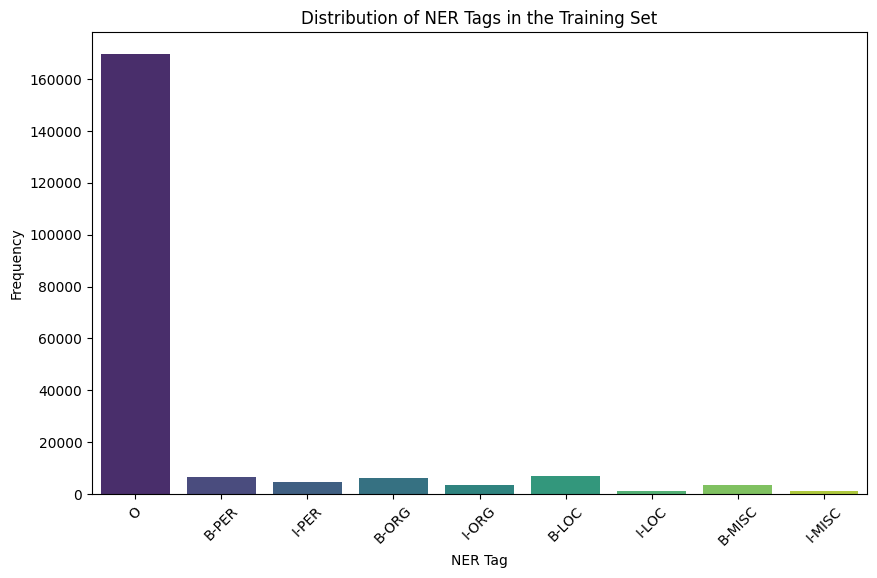

In [ ]:
# Flatten the list of NER tags from the training set
all_ner_tags = [tag for sample in dataset['train']['ner_tags'] for tag in sample]

# Create a DataFrame for analysis
tag_counts = pd.Series(all_ner_tags).value_counts().sort_index()
tag_labels = [ner_tags[i] for i in tag_counts.index]

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_labels, y=tag_counts.values, palette='viridis')
plt.title("Distribution of NER Tags in the Training Set")
plt.xlabel("NER Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


## Analysis of NER Tag Distribution

### Observations:
1. The majority of tokens in our dataset are labeled with the **"O"** tag, indicating they are not part of any named entity. This is typical in NER tasks, as most words in a sentence do not belong to specific entities.
2. The **B-PER** (Beginning of Person) and **I-PER** (Inside of Person) tags have relatively higher counts compared to other entity types like **B-ORG** (Beginning of Organization) and **B-LOC** (Beginning of Location).
3. The **MISC** (Miscellaneous) entity type is the least common, suggesting that there are fewer non-standard or rare entities in our dataset.
4. The distribution is highly imbalanced, with the "O" tag dominating the dataset. This imbalance could affect model performance, potentially leading to a bias towards predicting non-entity tokens.

### Inicial thoughts:
- We should consider using **class weighting** or **oversampling** techniques during training to address the class imbalance.
- It will be important to evaluate our model's performance on the minority classes (e.g., MISC) to ensure that it generalizes well across all entity types.



## Sentence Length Analysis
Let's analyze the length of the sentences in the training set. This will help us understand the token length distribution, which is important when using models like BERT that have a maximum token limit (usually 512 tokens).


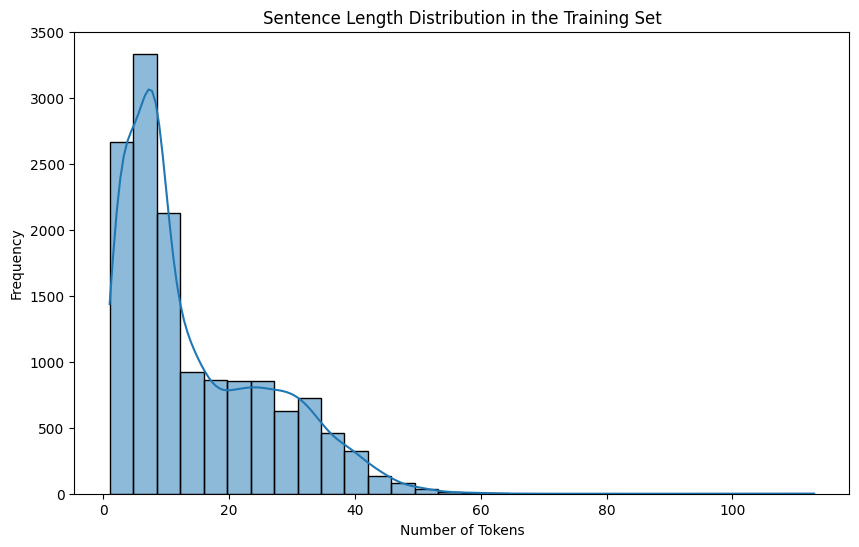

,0
count,14041.000000
mean,14.501887
std,11.602756
min,1.000000
25%,6.000000
50%,10.000000
75%,22.000000
max,113.000000


In [ ]:
# Calculate sentence lengths
sentence_lengths = [len(tokens) for tokens in dataset['train']['tokens']]

# Plot the sentence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.title("Sentence Length Distribution in the Training Set")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

# Display basic statistics for sentence lengths
pd.Series(sentence_lengths).describe()


## Analysis of Sentence Length Distribution

### Observations:
1. The majority of sentences in our training set are relatively short, with the highest frequency occurring around **10-15 tokens** per sentence.
2. The distribution is right-skewed, indicating that most sentences have fewer than **30 tokens**, with a long tail of sentences extending up to **100 tokens**.
3. Given the token limit of **512** for models like BERT, almost all sentences fit well within this limit, so truncation should not be a significant issue.

### Recommendations:
- We should consider batching sentences based on similar lengths during training (using dynamic padding) to optimize memory usage.
- The longer sentences in the dataset may contain more complex or nested entities, which could be challenging for the model. We should evaluate our model's performance specifically on these longer sentences to ensure it handles them effectively.



## Missing Values Check
We will check for any missing values in the dataset, as these could cause issues during model training.


In [ ]:
# Check for missing values in the training set
missing_values = pd.DataFrame(dataset['train'].to_pandas().isnull().sum(), columns=["Missing Values"])
missing_values


,Missing Values
id,0
tokens,0
pos_tags,0
chunk_tags,0
ner_tags,0


## Preliminary Observations
Based on the data exploration, we can make the following observations:
- The training set has **X samples**, the validation set has **Y samples**, and the test set has **Z samples**.
- The NER tags are relatively well-distributed, but there may be a slight imbalance with fewer **MISC** entities.
- The majority of sentences are under **50 tokens**, which fits well within the 512-token limit for BERT-based models.
- There are no missing values detected, so we can proceed without additional imputation steps.

These insights will guide our preprocessing and model selection in the next steps.
